In [3]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

dataset = pd.read_csv('Churn_Modelling.csv')
print(dataset.head(5))
# dataset.info()


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(method = 'pearson'), cmap = 'BrBG', fmt='.2f', linewidths=2, annot=True)


ValueError: could not convert string to float: 'Hargrave'

<Figure size 1200x600 with 0 Axes>

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\3457137556.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, index)
C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\3457137556.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])
C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\3457137556.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

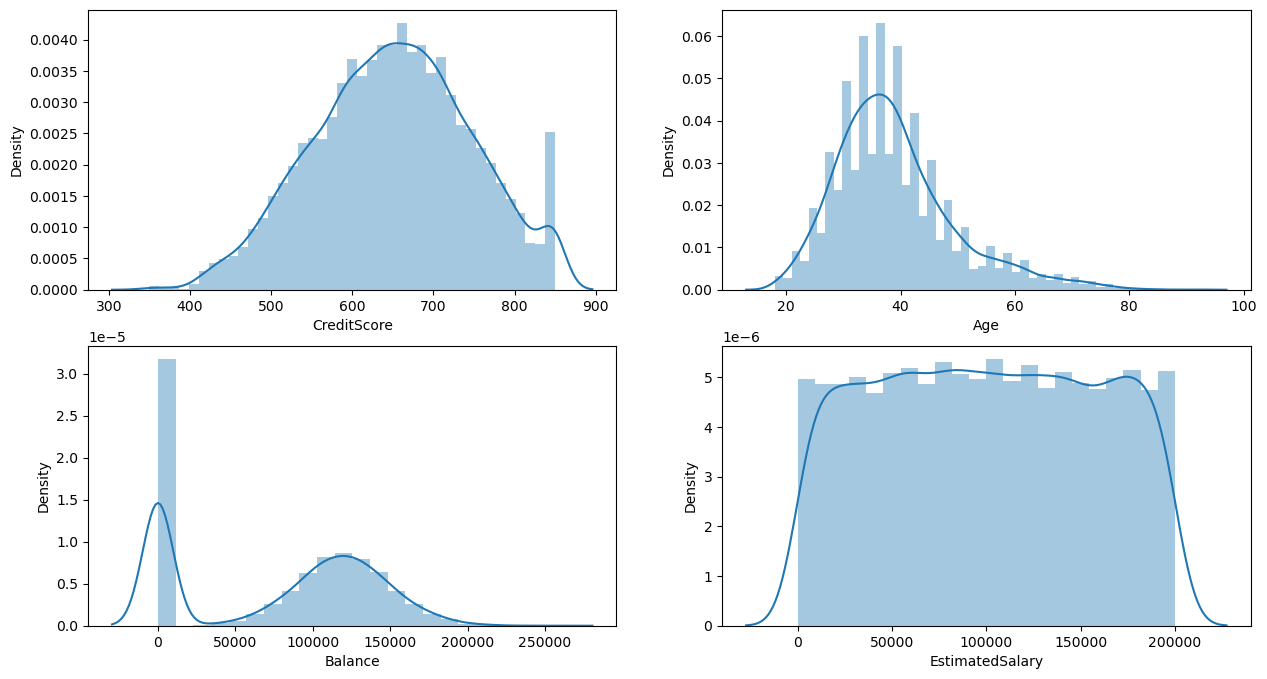

In [4]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.subplots(figsize=(15, 8))
index = 1

for i in lis:
    plt.subplot(2, 2, index)
    sns.distplot(dataset[i])
    index += 1

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\4018781354.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,index)


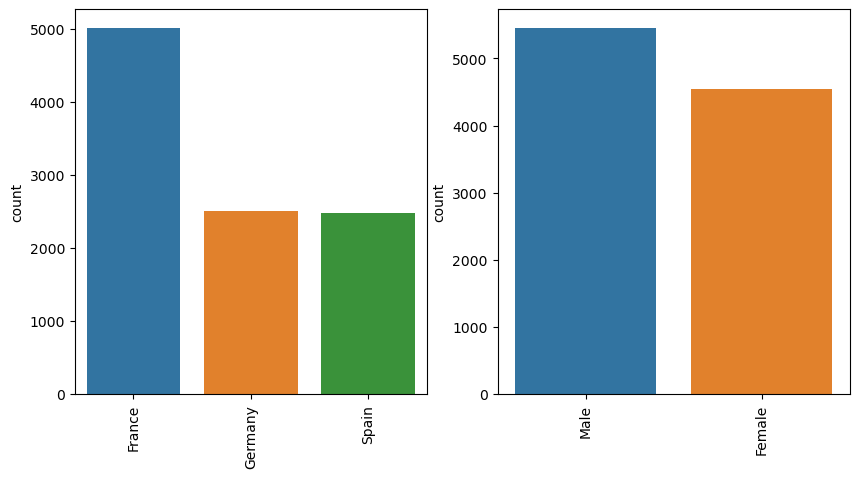

In [10]:
lis2 = ['Geography', 'Gender']
plt.subplots(figsize = (10,5))
index = 1

for col in lis2:
    y = dataset[col].value_counts()
    plt.subplot(1,2,index)
    index = index+1
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y) 
#     print(y.index)

In [13]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [17]:
dataset['Geography'].fillna(dataset['Geography'].mode()[0], inplace = True)
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace = True)
dataset['Age'].fillna(dataset['Age'].mean(),inplace = True)

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
le = LabelEncoder()
dataset['Geography']= le.fit_transform(dataset['Geography'])
dataset['Gender']= le.fit_transform(dataset['Gender'])
print(dataset.head())

   RowNumber  CustomerId   Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602  Hargrave          619          0       0   42   
1          2    15647311      Hill          608          2       0   41   
2          3    15619304      Onio          502          0       0   42   
3          4    15701354      Boni          699          0       0   39   
4          5    15737888  Mitchell          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4      

In [27]:
x = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13:14].values

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=8)
rfc = RandomForestClassifier(n_estimators=20, criterion= 'entropy', random_state = 0)
svc = SVC()
lr  = LogisticRegression()

In [48]:
for clf in (rfc, knn, svc, lr):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy score of ", clf.__class__.__name__, "=", 100*metrics.accuracy_score(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy score of  RandomForestClassifier = 85.65


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score of  KNeighborsClassifier = 84.15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of  SVC = 86.15
Accuracy score of  LogisticRegression = 80.75


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
